# 

### MODEL PREDICTION

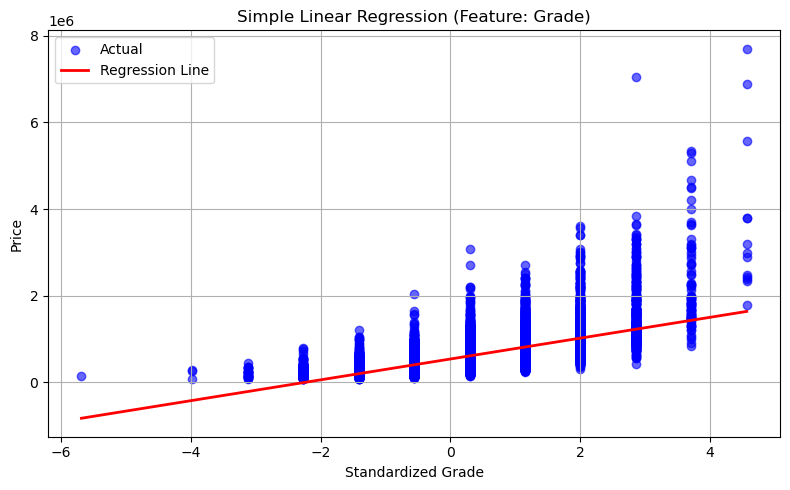

In [10]:
#  Simple Linear Regression 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
file_path = "C:\\Users\\Locini\\Downloads\\predict_price.csv"
data = pd.read_csv(file_path)
# Define target and feature
y = data['price']
X_simple = data[['grade']]

# Split data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Scale feature
scaler_simple = StandardScaler()
X_train_s_scaled = scaler_simple.fit_transform(X_train_s)
X_test_s_scaled = scaler_simple.transform(X_test_s)

# Train model
model_simple = LinearRegression()
model_simple.fit(X_train_s_scaled, y_train_s)

# Predictions
y_pred_simple_train = model_simple.predict(X_train_s_scaled)
y_pred_simple = model_simple.predict(X_test_s_scaled)

#  Plot Regression Line 
# Combine training data for better visualization
X_all_scaled = np.vstack((X_train_s_scaled, X_test_s_scaled))
y_all = np.concatenate((y_train_s, y_test_s))
y_pred_all = model_simple.predict(X_all_scaled)

# Sort for line plot
sorted_idx = X_all_scaled[:, 0].argsort()
X_sorted = X_all_scaled[sorted_idx]
y_sorted = y_all[sorted_idx]
y_pred_sorted = y_pred_all[sorted_idx]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_all_scaled, y_all, label='Actual', alpha=0.6, color='blue')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression (Feature: Grade)')
plt.xlabel('Standardized Grade')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



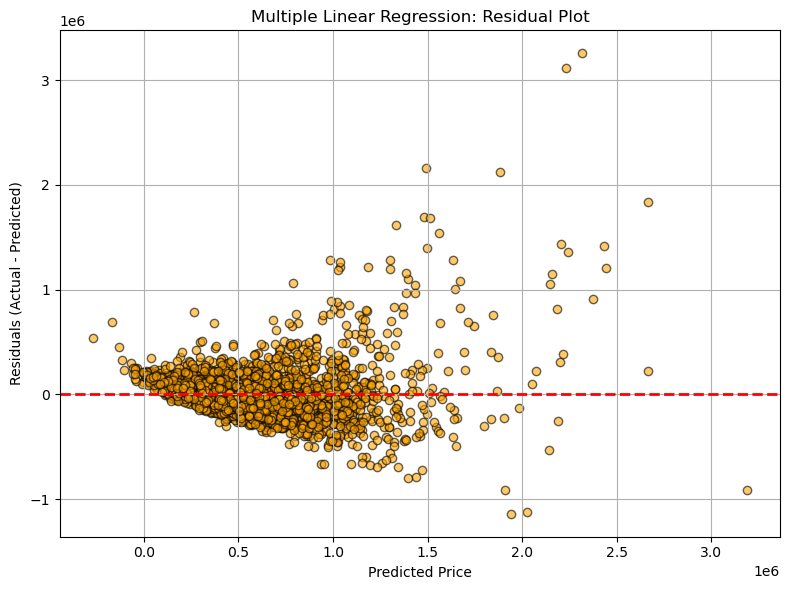

In [11]:
#  Multiple Linear Regression 
X_multiple = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                   'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                   'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
                   'sqft_living15', 'sqft_lot15']]
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y, test_size=0.2, random_state=42)
scaler_multi = StandardScaler()
X_train_m_scaled = scaler_multi.fit_transform(X_train_m)
X_test_m_scaled = scaler_multi.transform(X_test_m)
model_multi = LinearRegression()
model_multi.fit(X_train_m_scaled, y_train_m)
y_pred_multi_train = model_multi.predict(X_train_m_scaled)
y_pred_multi = model_multi.predict(X_test_m_scaled)
#  Residual Plot 
residuals = y_test_m - y_pred_multi

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_multi, residuals, alpha=0.6, color='orange', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Multiple Linear Regression: Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#  Polynomial Regression (Degree 2) 
X_poly = X_multiple.copy()
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_transformed = poly_features.fit_transform(X_poly)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly_transformed, y, test_size=0.2, random_state=42)
scaler_poly = StandardScaler()
X_train_p_scaled = scaler_poly.fit_transform(X_train_p)
X_test_p_scaled = scaler_poly.transform(X_test_p)
model_poly = LinearRegression()
model_poly.fit(X_train_p_scaled, y_train_p)
y_pred_poly_train = model_poly.predict(X_train_p_scaled)
y_pred_poly = model_poly.predict(X_test_p_scaled)


In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# EVALUATION 
def evaluate_model(y_true, y_pred, name, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return {"Model": name, "Set": set_name, "R²": r2, "MSE": mse, "RMSE": rmse, "MAE": mae}

results = []
results.append(evaluate_model(y_train_s, y_pred_simple_train, "Simple", "Train"))
results.append(evaluate_model(y_test_s, y_pred_simple, "Simple", "Test"))
results.append(evaluate_model(y_train_m, y_pred_multi_train, "Multiple", "Train"))
results.append(evaluate_model(y_test_m, y_pred_multi, "Multiple", "Test"))
results.append(evaluate_model(y_train_p, y_pred_poly_train, "Polynomial", "Train"))
results.append(evaluate_model(y_test_p, y_pred_poly, "Polynomial", "Test"))

comparison_df = pd.DataFrame(results)
print("\n=== Model Evaluation Scores (Train vs Test) ===")
print(comparison_df.to_string(index=False))


=== Model Evaluation Scores (Train vs Test) ===
     Model   Set       R²          MSE          RMSE           MAE
    Simple Train 0.442384 7.294728e+10 270087.534465 173951.122163
    Simple  Test 0.455388 8.242951e+10 287105.403109 176324.873382
  Multiple Train 0.695112 3.988534e+10 199713.154862 125465.460881
  Multiple  Test 0.695740 4.605116e+10 214595.336151 128272.926326
Polynomial Train 0.819534 2.360854e+10 153650.698552 100090.220301
Polynomial  Test 0.781325 3.309744e+10 181927.027682 107453.691980


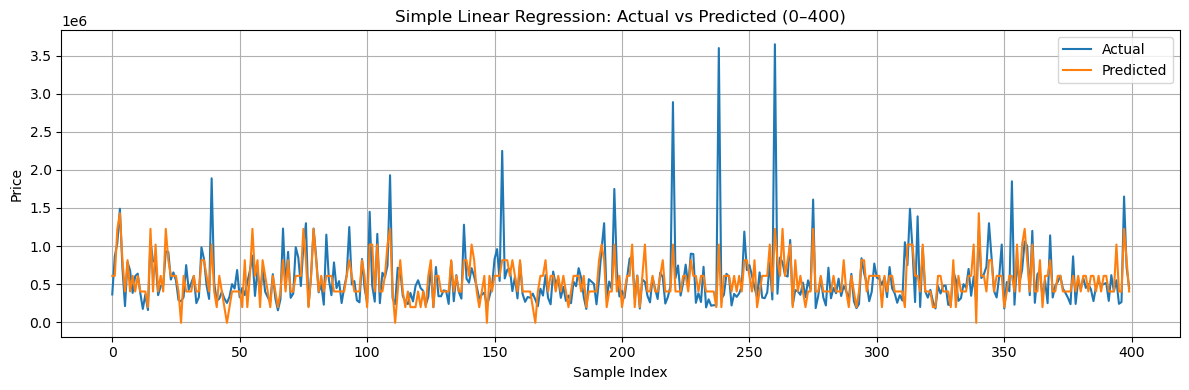

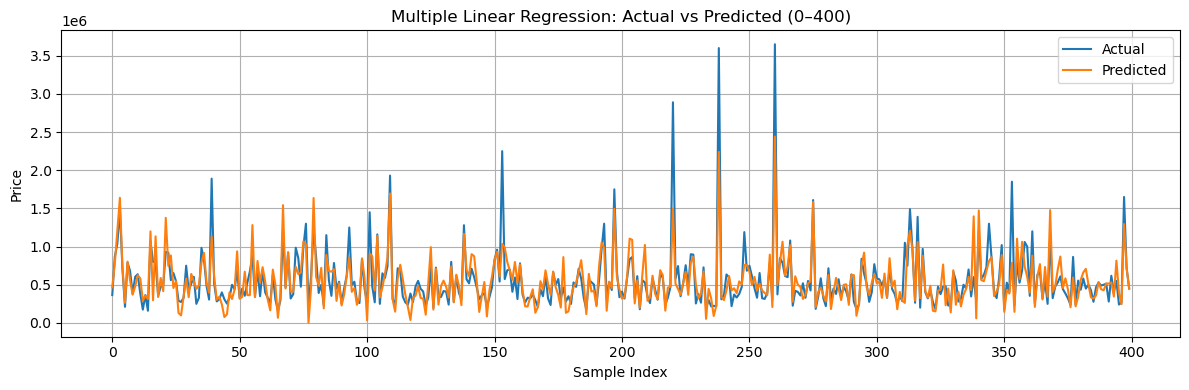

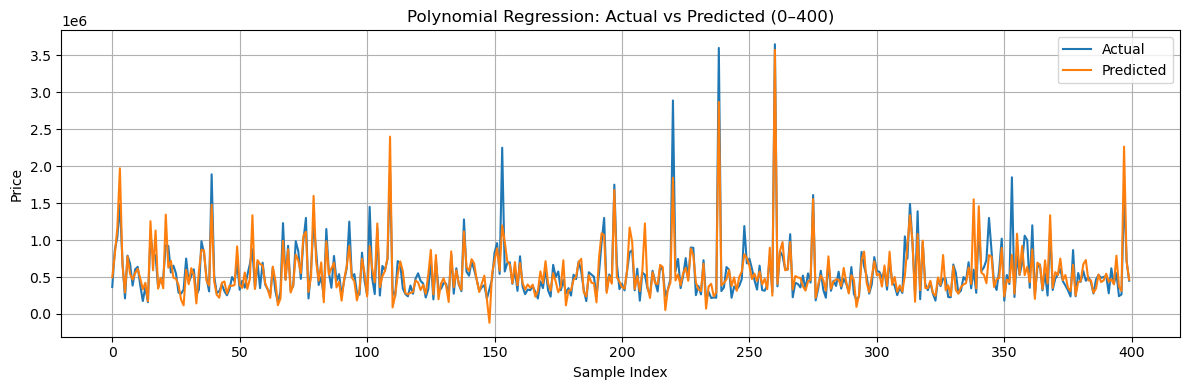

In [14]:
# ACTUAL VS PREDICTED PLOTS 
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(12, 4))
    plt.plot(y_true.values[0:400], label='Actual')
    plt.plot(y_pred[0:400], label='Predicted')
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_test_s, y_pred_simple, "Simple Linear Regression: Actual vs Predicted (0–400)")
plot_actual_vs_predicted(y_test_m, y_pred_multi, "Multiple Linear Regression: Actual vs Predicted (0–400)")
plot_actual_vs_predicted(y_test_p, y_pred_poly, "Polynomial Regression: Actual vs Predicted (0–400)")

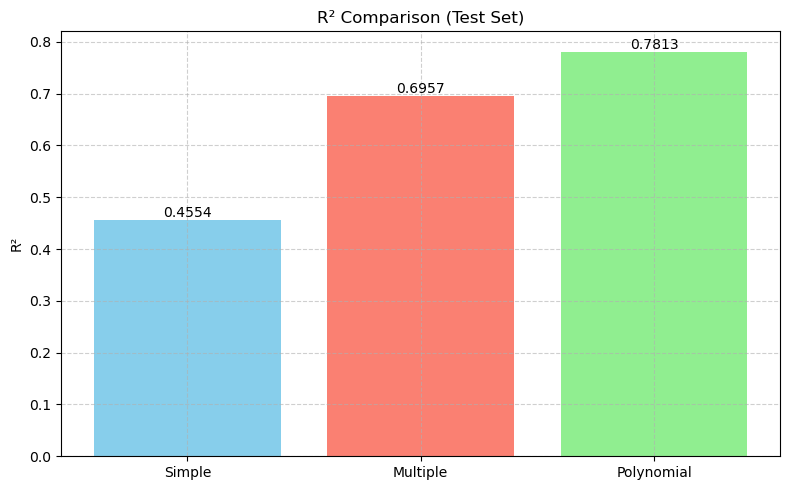

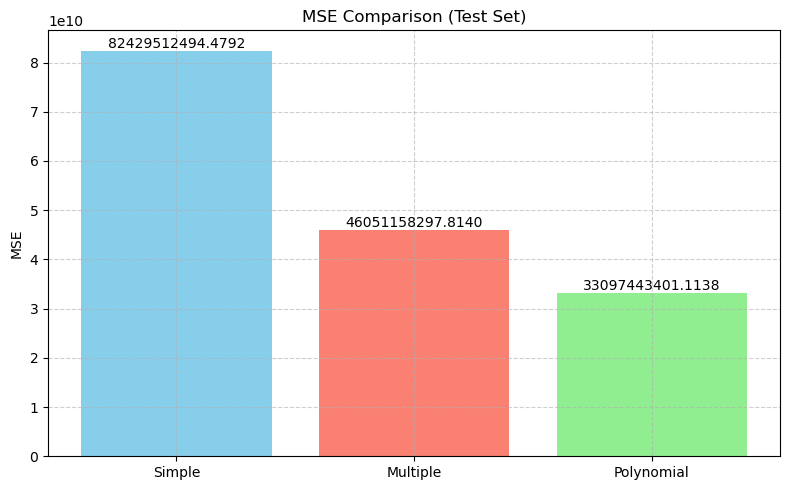

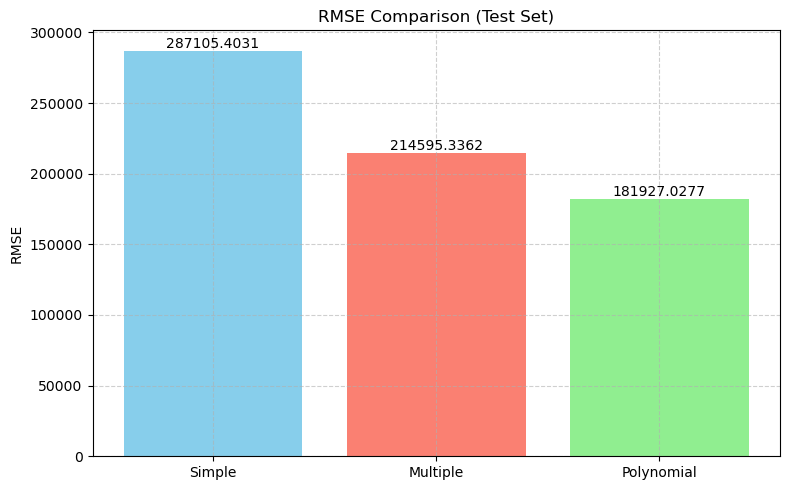

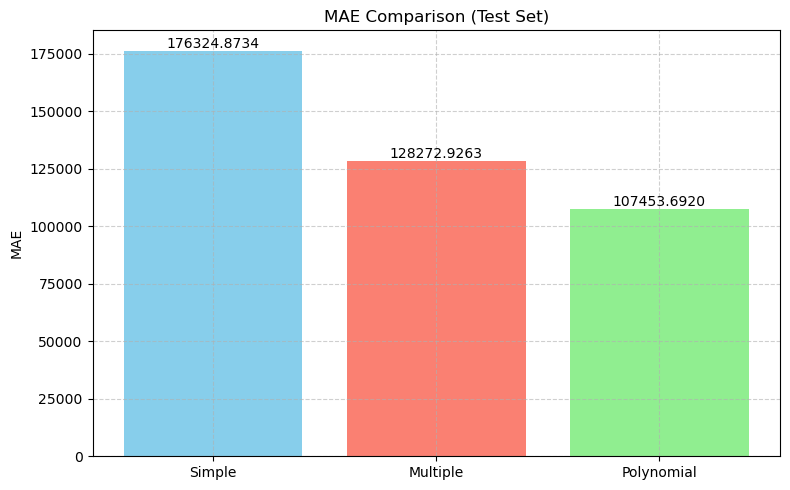

In [15]:
# -------------------------- COMPARISON BAR PLOTS --------------------------
model_names = ['Simple', 'Multiple', 'Polynomial']
x_indexes = np.arange(len(model_names))
test_results = {metric: [] for metric in ['R²', 'MSE', 'RMSE', 'MAE']}
for res in results:
    if res['Set'] == 'Test':
        for metric in test_results:
            test_results[metric].append(res[metric])

for metric in ['R²', 'MSE', 'RMSE', 'MAE']:
    plt.figure(figsize=(8, 5))
    bars = plt.bar(model_names, test_results[metric], color=['skyblue', 'salmon', 'lightgreen'])
    plt.title(f'{metric} Comparison (Test Set)')
    plt.ylabel(metric)
    plt.grid(True, linestyle='--', alpha=0.6)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()


Evaluating Polynomial Linear Regression with K-Fold Cross-Validation:

 K = 3 Folds
R² Scores: [0.6926 0.6908 0.6983]
Average R² Score: 0.6939

 K = 4 Folds
R² Scores: [0.6998 0.669  0.7122 0.6973]
Average R² Score: 0.6946

 K = 5 Folds
R² Scores: [0.6957 0.6818 0.6922 0.7016 0.7002]
Average R² Score: 0.6943

 K = 6 Folds
R² Scores: [0.6861 0.7005 0.6663 0.7204 0.7053 0.6894]
Average R² Score: 0.6947

 K = 7 Folds
R² Scores: [0.6779 0.7167 0.6718 0.6934 0.6988 0.7105 0.694 ]
Average R² Score: 0.6947

 K = 8 Folds
R² Scores: [0.6729 0.7249 0.673  0.6636 0.7205 0.7045 0.7079 0.6868]
Average R² Score: 0.6943

 K = 9 Folds
R² Scores: [0.6764 0.7249 0.6817 0.6748 0.6861 0.7161 0.6912 0.7167 0.6846]
Average R² Score: 0.6947

 K = 10 Folds
R² Scores: [0.6838 0.7073 0.6921 0.6735 0.6676 0.7231 0.7045 0.6973 0.7177 0.6811]
Average R² Score: 0.6948



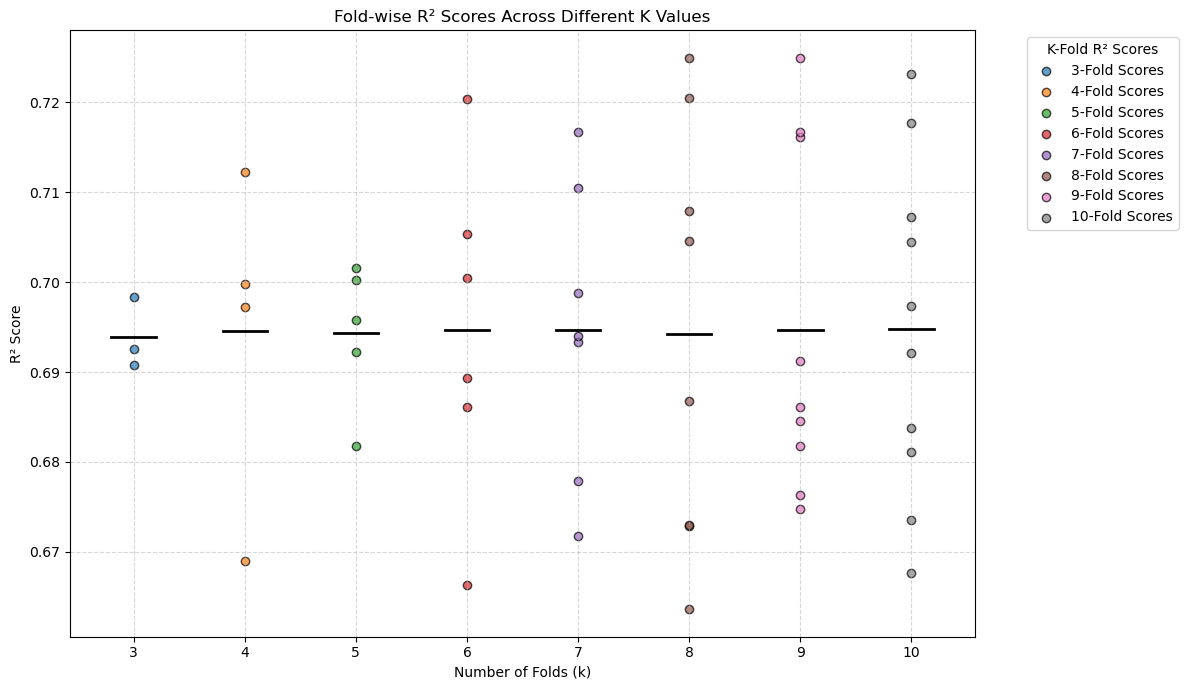

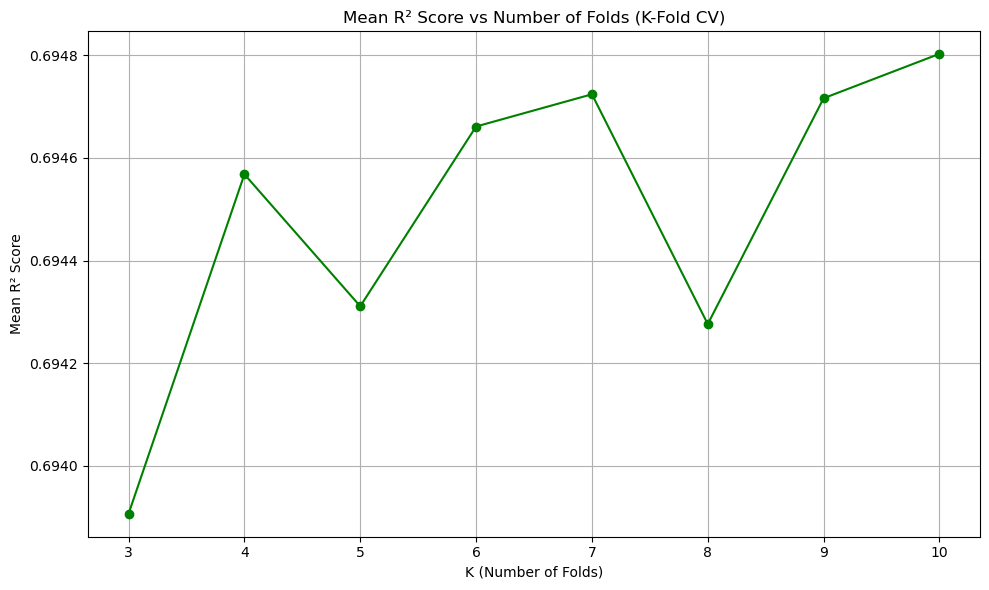

In [16]:
from sklearn.model_selection import  KFold
# -------------------------- K-FOLD CROSS VALIDATION --------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)
k_values = list(range(3, 11))
all_fold_r2s = []
mean_r2_scores = []

print("\nEvaluating Polynomial Linear Regression with K-Fold Cross-Validation:\n")

for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    r2_scores = []
    for train_index, test_index in kf.split(X_scaled):
        X_train_k, X_test_k = X_scaled[train_index], X_scaled[test_index]
        y_train_k, y_test_k = y.iloc[train_index], y.iloc[test_index]
        model_k = LinearRegression()
        model_k.fit(X_train_k, y_train_k)
        y_pred_k = model_k.predict(X_test_k)
        r2_scores.append(r2_score(y_test_k, y_pred_k))
    all_fold_r2s.append(r2_scores)
    avg_r2 = np.mean(r2_scores)
    mean_r2_scores.append(avg_r2)
    print(f" K = {k} Folds")
    print(f"R² Scores: {np.round(r2_scores, 4)}")
    print(f"Average R² Score: {avg_r2:.4f}\n")

# --- Plot 1: Fold-wise R² Scores and Averages ---
plt.figure(figsize=(12, 7))
for i, (k, r2s) in enumerate(zip(k_values, all_fold_r2s)):
    plt.scatter([k] * len(r2s), r2s, label=f'{k}-Fold Scores', alpha=0.7, edgecolor='k')
    plt.plot([k - 0.2, k + 0.2], [np.mean(r2s), np.mean(r2s)], color='black', linewidth=2)
plt.title('Fold-wise R² Scores Across Different K Values')
plt.xlabel('Number of Folds (k)')
plt.ylabel('R² Score')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.5)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='K-Fold R² Scores', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Plot 2: Mean R² Score vs K ---
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_r2_scores, marker='o', color='green')
plt.title("Mean R² Score vs Number of Folds (K-Fold CV)")
plt.xlabel("K (Number of Folds)")
plt.ylabel("Mean R² Score")
plt.grid(True)
plt.tight_layout()
plt.show()


### RESULT

### This indicates that the model performs well on both training and test sets, but there's a slight drop in generalization performance as observed in the K-Fold validation, suggesting some overfitting may still exist.